# Import Modules

In [1]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import os
import glob
import gc
%load_ext memory_profiler

## Change CWD to ini dir

In [2]:
%cd ..

/home/pl1023/documents/IRP


# Matlab - read_raw()

## Visualize Ground Truth for a Downsampled raw image

the mat file stored at tests/test_data stored the variable if reading downsampled raw image (stored at tests/test_data) using Matlab function read_raw()

In [3]:
# Load the .mat file
mat_data = loadmat('./tests/test_data/downsampled_raw_image.mat')

# Extract the variable from the loaded .mat data
img_matlab = mat_data['LA2_d20_v1']

Image shape: (254, 254, 253)
Slice indices: [63, 126, 190]


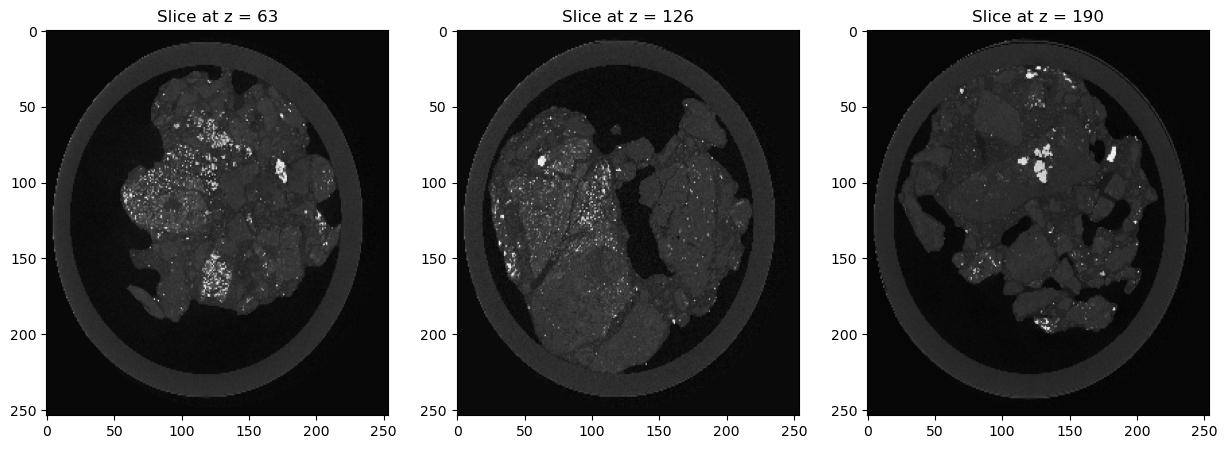

In [4]:
# Select slices to display (e.g., slice at 1/4, 1/2, and 3/4 of the z-dimension)
# should be the same slice in Matlab plot (index - 1 in python)
slice_indices = [63, 126, 190]

# Verify the shape of the NumPy array and selected slice indices
print(f"Image shape: {img_matlab.shape}")
print(f"Slice indices: {slice_indices}")

# Display the selected slices in Python
fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))
for i, idx in enumerate(slice_indices):
    axes[i].imshow(img_matlab[:, :, idx], cmap='gray')
    axes[i].axis('equal')
    axes[i].axis('tight')
    axes[i].set_title(f'Slice at z = {idx}')
plt.show()

After checking corresponding values for the variable here in python and the variable in Matlab, they are exactly the same (the image shown are same)

## Python - read_raw()

Here, I apply the python version read_raw() function to read the same downsampled raw image before. After this, check if the result is the same as the ground truth

In [5]:
from ToolKit4D import dataio as dio

In [6]:
img_python = dio.read_raw('./tests/test_data/LA2_d20_v1_uint16_unnormalised_254_254_253.raw', [254, 254, 253], 'uint16')

Image shape: (254, 254, 253)
Slice indices: [63, 126, 190]


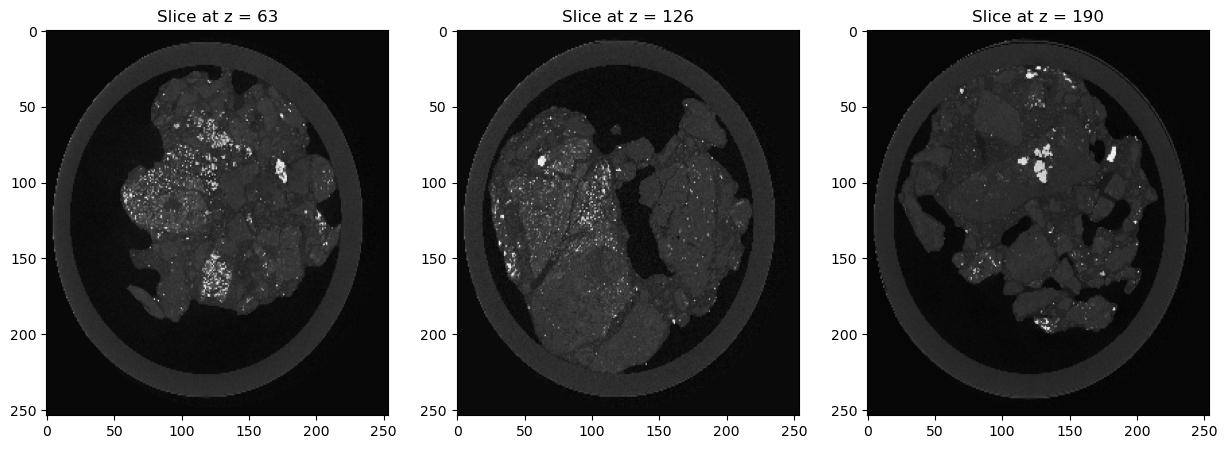

In [7]:
# Select slices to display (e.g., slice at 1/4, 1/2, and 3/4 of the z-dimension)
# should be the same slice in Matlab plot (index - 1 in python)
slice_indices = [63, 126, 190]

# Verify the shape of the NumPy array and selected slice indices
print(f"Image shape: {img_python.shape}")
print(f"Slice indices: {slice_indices}")

# Display the selected slices in Python
fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))
for i, idx in enumerate(slice_indices):
    axes[i].imshow(img_python[:, :, idx], cmap='gray')
    axes[i].axis('equal')
    axes[i].axis('tight')
    axes[i].set_title(f'Slice at z = {idx}')
plt.show()

### Compare These two variables

In [8]:
are_equal = np.array_equal(img_python, img_matlab)
print("Are the arrays exactly equal? \n", are_equal)

Are the arrays exactly equal? 
 True


# Matlab - threshold_rocks

## Python - threshold_rocks

In [9]:
from ToolKit4D import thresholding

In [10]:
ret = thresholding.threshold_rock('./tests/test_data/LA2_d20_v1_uint16_unnormalised_254_254_253.raw', nbins=256)

In [11]:
ret

13364.0

In [12]:
img_bi = img_python >= ret

Image shape: (254, 254, 253)
Slice indices: [63, 126, 190]


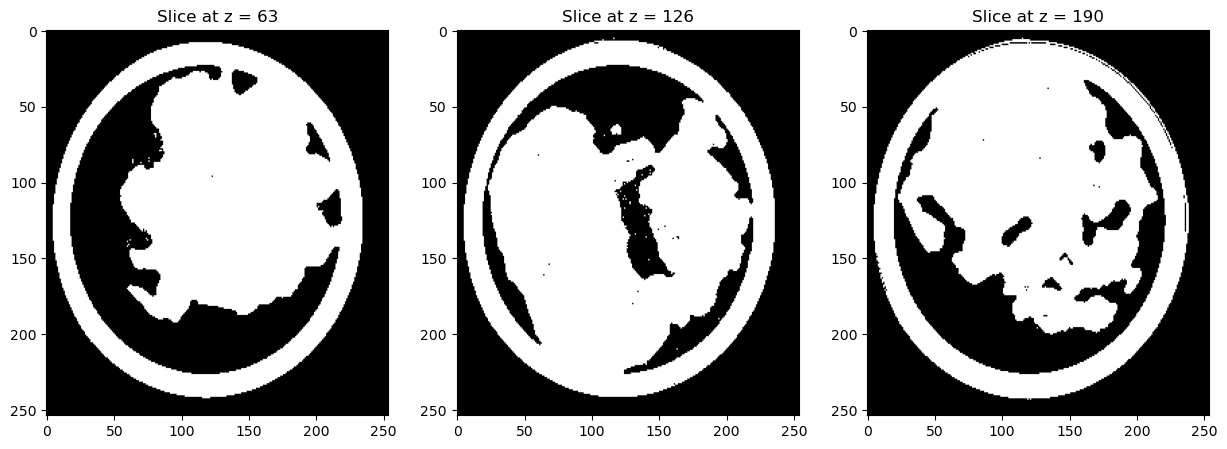

In [13]:
# Select slices to display (e.g., slice at 1/4, 1/2, and 3/4 of the z-dimension)
# should be the same slice in Matlab plot (index - 1 in python)
slice_indices = [63, 126, 190]

# Verify the shape of the NumPy array and selected slice indices
print(f"Image shape: {img_bi.shape}")
print(f"Slice indices: {slice_indices}")

# Display the selected slices in Python
fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))
for i, idx in enumerate(slice_indices):
    axes[i].imshow(img_bi[:, :, idx], cmap='gray')
    axes[i].axis('equal')
    axes[i].axis('tight')
    axes[i].set_title(f'Slice at z = {idx}')
plt.show()

# Matlab - remove_cylinder

## Python - remove_cylinder

In [14]:
from ToolKit4D.utils.remove_cylinder import detect_ring
from ToolKit4D.utils import remove_cylinder

In [15]:
detect_ring(img_bi[:, :, 100], 100, 150)

(array([118.5, 123.5], dtype=float32), 117.0)

['./tests/test_data/LA2_d20_v1_uint16_unnormalised_254_254_253.raw', './tests/test_data/LA2_d0_v1_uint16_unnormalised_254_254_254.raw']


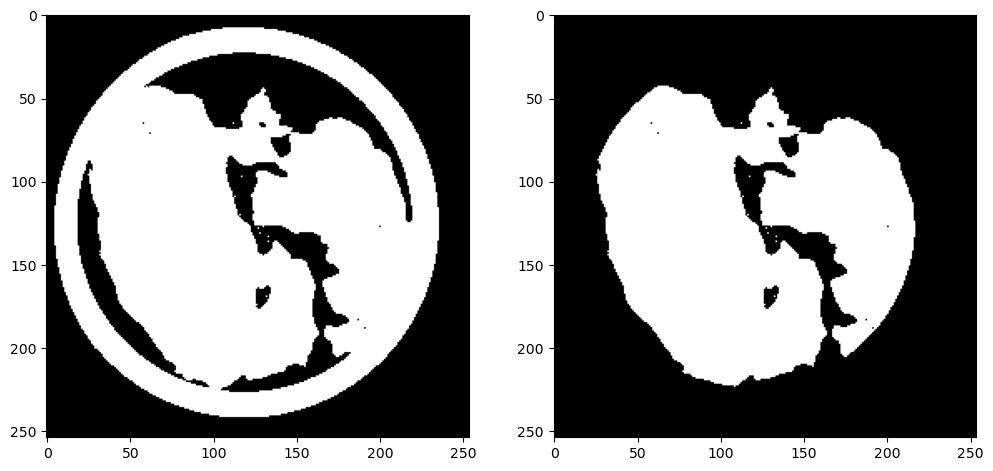

In [16]:
test_data_path = './tests/test_data/'
test_raw_path = os.path.join(test_data_path, '*.raw')
raw_files = glob.glob(test_raw_path)
print(raw_files)
raw_file = raw_files[0]
clean_path = os.path.basename(raw_file)
file_name = os.path.splitext(clean_path)[0]
fnparts = file_name.split('_')
img = dio.read_raw(
    raw_file,
    [int(fnparts[5]), int(fnparts[6]), int(fnparts[7])],
    fnparts[3])
rock_thresh = thresholding.threshold_rock(raw_image=img)
img_binary = img >= rock_thresh

slice = 100
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_binary[:,:,slice], cmap='gray')
img_no = remove_cylinder(img_binary, 99, 1.5)
axes[1].imshow(img_no[:,:,slice], cmap='gray')

# Matlab - Segment_rocks

In [17]:
from ToolKit4D.pipeline import ToolKitPipeline

In [18]:
a = ToolKitPipeline('./tests/test_data/LA2_d20_v1_uint16_unnormalised_254_254_253.raw')

In [19]:
a.segment_rocks()

-----Finding Rock Threshold-----
	 calling threshold_rock()
-----Removing Cylinder-----
	 calling remove_cylinder()
-----Segment Rocks-----
	 calling segment_rocks()


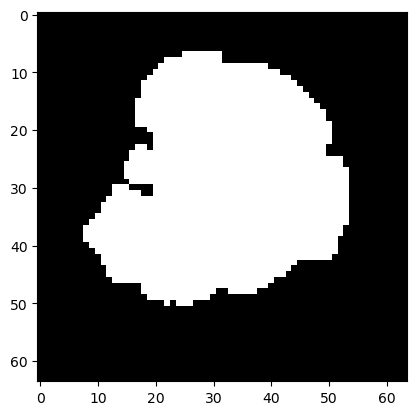

In [20]:
plt.imshow(a.optimized_rock_mask[:,:,10], cmap='gray')

# Matlab - Agglomerate_extraction

In [21]:
from ToolKit4D.pipeline import ToolKitPipeline

In [22]:
a = ToolKitPipeline('./tests/test_data/LA2_d0_v1_uint16_unnormalised_254_254_254.raw')

In [23]:
a.agglomerate_extraction()

-----Finding Rock Threshold-----
	 calling threshold_rock()
-----Removing Cylinder-----
	 calling remove_cylinder()
-----Segment Rocks-----
	 calling segment_rocks()
-----Extract Agglomerates-----
	 calling agglomerate_extraction()


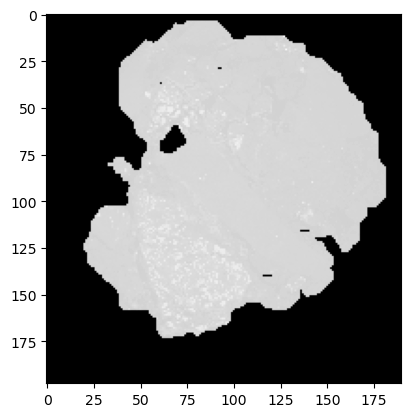

In [24]:
sli = 15
plt.imshow(a.frag[:,:,sli], cmap='gray')

In [25]:
mat_data = loadmat('./tests/test_data/agglomerate_extraction.mat')
frag_m = mat_data['data'][a.identifier][0][0]

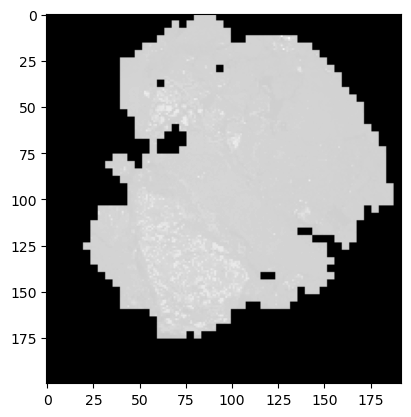

In [26]:
plt.imshow(frag_m[:,:,sli], cmap='gray')

# Matlab - th_entropy_lesf

In [27]:
from ToolKit4D.pipeline import ToolKitPipeline

In [28]:
%%memit
a = ToolKitPipeline('./tests/test_data/LA2_d0_v1_uint16_unnormalised_254_254_254.raw')

peak memory: 464.79 MiB, increment: 0.10 MiB


In [29]:
a.th_entropy_lesf()

-----Finding Rock Threshold-----
	 calling threshold_rock()
-----Removing Cylinder-----
	 calling remove_cylinder()
-----Segment Rocks-----
	 calling segment_rocks()
-----Extract Agglomerates-----
	 calling agglomerate_extraction()
-----Finding Grain Threshold
	 calling th_entropy_lesf()


# Python - Pipeline class

## Memory Profiling

In [30]:
from ToolKit4D.pipeline import ToolKitPipeline
from memory_profiler import memory_usage

In [31]:
def process_pipeline():
    processor_nodel = ToolKitPipeline('./tests/test_data/LA2_d0_v1_uint16_unnormalised_254_254_254.raw')
    processor_nodel.threshold_rock(del_attr=True)
    processor_nodel.segment_rocks(del_attr=True)
    processor_nodel.agglomerate_extraction(del_attr=True)
    processor_nodel.th_entropy_lesf(del_attr=True)

mem_usage = memory_usage(process_pipeline, interval=1, timeout=5)
print(f"Memory usage: {mem_usage}")

-----Finding Rock Threshold-----
	 calling threshold_rock()
-----Removing Cylinder-----
	 calling remove_cylinder()
-----Segment Rocks-----
	 calling segment_rocks()
-----Extract Agglomerates-----
	 calling agglomerate_extraction()
-----Finding Grain Threshold
	 calling th_entropy_lesf()
Memory usage: [466.55859375, 466.55859375, 516.23828125, 516.44140625, 516.44140625, 516.44140625]


In [32]:
def process_pipeline():
    processor_nodel = ToolKitPipeline('./tests/test_data/LA2_d0_v1_uint16_unnormalised_254_254_254.raw')
    processor_nodel.threshold_rock(del_attr=False)
    processor_nodel.segment_rocks(del_attr=False)
    processor_nodel.agglomerate_extraction(del_attr=False)
    processor_nodel.th_entropy_lesf(del_attr=False)

mem_usage = memory_usage(process_pipeline, interval=1, timeout=5)
print(f"Memory usage: {mem_usage}")

-----Finding Rock Threshold-----
	 calling threshold_rock()
-----Removing Cylinder-----
	 calling remove_cylinder()
-----Segment Rocks-----
	 calling segment_rocks()
-----Extract Agglomerates-----
	 calling agglomerate_extraction()
-----Finding Grain Threshold
	 calling th_entropy_lesf()
Memory usage: [516.44140625, 516.44140625, 532.203125, 532.203125, 532.203125, 467.21875]


In [33]:
%%memit
processor_del = ToolKitPipeline('./tests/test_data/LA2_d0_v1_uint16_unnormalised_254_254_254.raw')
processor_del.th_entropy_lesf()
gc.collect()

-----Finding Rock Threshold-----
	 calling threshold_rock()
-----Removing Cylinder-----
	 calling remove_cylinder()
-----Segment Rocks-----
	 calling segment_rocks()
-----Extract Agglomerates-----
	 calling agglomerate_extraction()
-----Finding Grain Threshold
	 calling th_entropy_lesf()
peak memory: 621.73 MiB, increment: 154.51 MiB


In [34]:
%%memit
processor_nodel = ToolKitPipeline('./tests/test_data/LA2_d0_v1_uint16_unnormalised_254_254_254.raw')
processor_nodel.threshold_rock(del_attr=False)
processor_nodel.segment_rocks(del_attr=False)
processor_nodel.agglomerate_extraction(del_attr=False)
processor_nodel.th_entropy_lesf(del_attr=False)

-----Finding Rock Threshold-----
	 calling threshold_rock()
-----Removing Cylinder-----
	 calling remove_cylinder()
-----Segment Rocks-----
	 calling segment_rocks()
-----Extract Agglomerates-----
	 calling agglomerate_extraction()
-----Finding Grain Threshold
	 calling th_entropy_lesf()
peak memory: 687.11 MiB, increment: 154.55 MiB


In [35]:
%%memit
processor_nodel = ToolKitPipeline('./tests/test_data/LA2_d0_v1_uint16_unnormalised_254_254_254.raw')
processor_nodel.threshold_rock(del_attr=True)
processor_nodel.segment_rocks(del_attr=True)
processor_nodel.agglomerate_extraction(del_attr=True)
processor_nodel.th_entropy_lesf(del_attr=True)

-----Finding Rock Threshold-----
	 calling threshold_rock()
-----Removing Cylinder-----
	 calling remove_cylinder()
-----Segment Rocks-----
	 calling segment_rocks()
-----Extract Agglomerates-----
	 calling agglomerate_extraction()
-----Finding Grain Threshold
	 calling th_entropy_lesf()
peak memory: 722.98 MiB, increment: 125.04 MiB
